In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import control as ctrl
import matplotlib.pyplot as plt
import scipy as np
np.set_printoptions(precision=3)
import scipy.linalg as la
import vibrationtesting as vt
import scipy.linalg as la
import control as ctrl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
m = 1
k = 40000
c = 2
Bt = 1
Ca = Cv = 0
Cd = 1

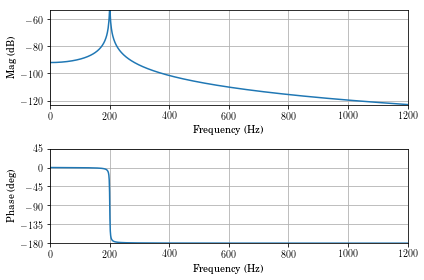

In [5]:
A, B, Css, D = vt.so2ss(np.array([[m]]), np.array([[c]]),np.array([[k]]),np.array([[Bt]]),np.array([[Cd]]),np.array([[Cv]]),np.array([[Ca]]))

omega, H = vt.ssfrf(A, B, Css, D, 0, 1200, 1, 1)

vt.frfplot(omega,H)

In [11]:
sys = ctrl.ss(A, B, Css, D)
sys

A = [[  0.000e+00   1.000e+00]
 [ -4.000e+04  -2.000e+00]]

B = [[ 0.]
 [ 1.]]

C = [[ 1.  0.]]

D = [[ 0.]]

In [41]:
time = np.linspace(0,4,4096)
u = np.random.randn(1,len(time))
u.shape

(1, 4096)

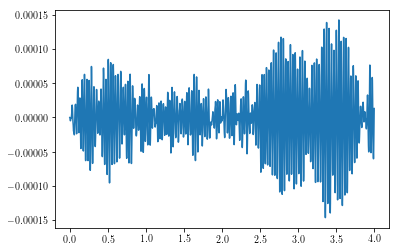

In [42]:
time, yout, xout = ctrl.forced_response(sys, U = u, T = time)
plt.plot(time,yout)

In [43]:
help(vt.hammer_impulse)

Help on function hammer_impulse in module vibrationtesting.signals:

hammer_impulse(time, imp_time=None, imp_duration=None, doublehit=False, dh_delta=None)
    Generate simulated hammer hit (half sin)
    
    Parameters
    ----------
    time : float array
        1 x N time array. Suggest using `np.linspace(0,10,1000).reshape(1,-1)`
        for example
    imp_time : float (optional)
        Time of onset of impulse. Default is 0.1 time end time- which
        traditionally works well for impact testing
    imp_duration : float (optional)
        Duration of impulse. Default is 0.01 of total record
    doublehit : Boolean (optional)
        Allows repeat of hit to emulate a bad strike. Default is False
    dh_delta : float (optional)
        Time difference between primary strike and accidental second strike
        Default is 0.02 of record.
    
    Returns
    -------
    force : float array
    
    Examples
    --------
    >>> import vibrationtesting as vt
    >>> time = np.li

In [44]:
u = vt.hammer_impulse(time, imp_duration = 0.004)

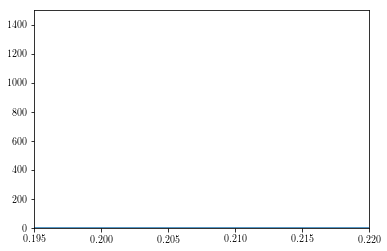

In [45]:
plt.plot(time, u.T)
_ = plt.axis([.0975*2, .11*2, 0, 1500])

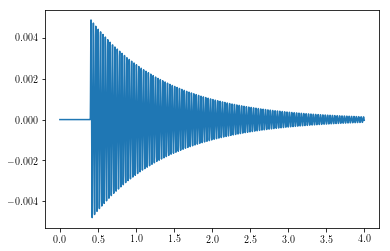

In [46]:
time, yout, xout = ctrl.forced_response(sys, U = u, T = time)
plt.plot(time, yout)
#plt.axis([0,2,-0.0001, 0.0004])

In [ ]:
freq, H1, H2, coh, Hv = vt.frfest(yout, u, time[1], windowname = 'none') 
#help(vt.frfest)

H2[0,:,0].shape

freq.shape

(2049,)

In [36]:
aa = freq.reshape(1,-1)
bb = H2[0,:,0].reshape(1,-1)

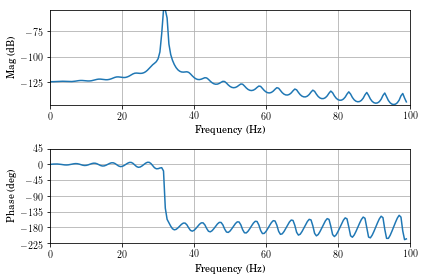

In [40]:
vt.frfplot(aa, bb, freq_max=100 )


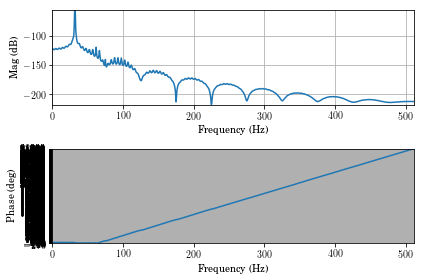

In [19]:
vt.frfplot(freq.reshape(1,-1), H2[0,:,0].reshape(1,-1))

In [ ]:
A, B, Css, D = vt.so2ss(M, C, K, Bt, Cd, Cv, Ca)

In [ ]:
print('A = \n{},\n B = \n{},\n C = \n{},\n D = \n{}'.format(A, B, Css, D))

In [ ]:
e, vec = la.eig(A)

In [7]:
vt.damp(A)

............... Eigenvalue ...........     Damping     Frequency
--------[re]---------[im]--------[abs]----------------------[Hz]
      -1.000        +199.997      200.000                         0.005         31.831
      -1.000        -199.997      200.000                         0.005         31.831


In [8]:
print(vec[:,0:1])

NameError: name 'vec' is not defined

In [9]:
sp.set_printoptions(precision=3)
print('{}'.format(vec))

NameError: name 'sp' is not defined

In [10]:
Ca = sp.array([[1, 0]])
Cd = Ca*0
Cv = Cd
Bt = sp.array([[1],[0]])
A, B, Css, D = vt.so2ss(M, C, K, Bt, Cd, Cv, Ca)

NameError: name 'sp' is not defined

In [ ]:
Ad, Bd, _, _ = vt.c2d(A, B, C, D, .1)

In [ ]:
Ad

In [ ]:
Bd

In [ ]:
Css

In [ ]:
D

In [ ]:
help(ctrl.ctrb)

In [ ]:
CC = ctrl.ctrb(Ad, Bd)
CC

In [ ]:
lanp.matrix_rank(CC)

In [ ]:
OO = ctrl.obsv(Ad, Css)
OO

In [ ]:
lanp.matrix_rank(OO)